In [1]:
import tensorflow as tf
import os
from tensorflow import keras
import keras_preprocessing as kp
import cv2
import imghdr

#https://www.kaggle.com/code/kausthubkannan/ai-human-art-classification-mobilenetv2-91/notebook

In [2]:
tf.get_logger().setLevel('INFO')

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [4]:

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
'''gpu_memory_fraction = 0.8  # Use 80% of the available GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth'''

"gpu_memory_fraction = 0.8  # Use 80% of the available GPU memory\ngpus = tf.config.experimental.list_physical_devices('GPU')\nif gpus:\n    for gpu in gpus:\n        tf.config.experimental.set_memory_growth"

In [6]:
os.listdir('AIandRealArt/train/')
data_loc = 'AIandRealArt/train/'

In [7]:
"""imgtypes = ['jpg','png','jpeg','bmp']
for iclass in os.listdir(data_loc):
    for image in os.listdir(os.path.join(data_loc,iclass)):
        image_path = os.path.join(data_loc,iclass,image)
        try:
            img = cv2.imread(image_path)
            typ = imghdr.what(image_path)
            if typ not in imgtypes:
                os.remove(image_path)
                print('Issue 1')
        except Exception as e:
            print("Issue")"""

'imgtypes = [\'jpg\',\'png\',\'jpeg\',\'bmp\']\nfor iclass in os.listdir(data_loc):\n    for image in os.listdir(os.path.join(data_loc,iclass)):\n        image_path = os.path.join(data_loc,iclass,image)\n        try:\n            img = cv2.imread(image_path)\n            typ = imghdr.what(image_path)\n            if typ not in imgtypes:\n                os.remove(image_path)\n                print(\'Issue 1\')\n        except Exception as e:\n            print("Issue")'

In [8]:
import numpy as np
from matplotlib import  pyplot as plt

In [9]:
data = tf.keras.preprocessing.image_dataset_from_directory(data_loc,shuffle =True)

Found 18618 files belonging to 2 classes.


In [10]:
data_it = data.as_numpy_iterator()

In [11]:
batch = data_it.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

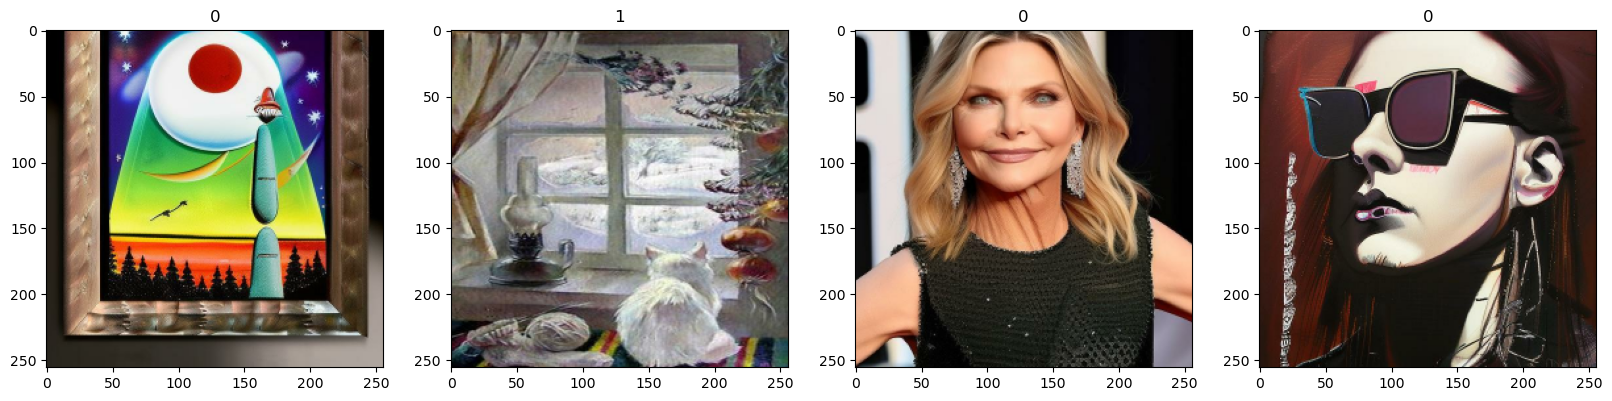

In [13]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 - Real
0 - AI

In [75]:
data_scaled = data.map(lambda x,y :((x/255),y))

In [76]:
scaled_it = data_scaled.as_numpy_iterator()

In [77]:
batch_scaled = scaled_it.next()
batch_scaled[0]

array([[[[0.8362745 , 0.9147059 , 0.97745097],
         [0.8333333 , 0.9245098 , 0.9980392 ],
         [0.8039216 , 0.91764706, 1.        ],
         ...,
         [0.3754902 , 0.4107843 , 0.3990196 ],
         [0.36960784, 0.40490195, 0.39313725],
         [0.38235295, 0.41764706, 0.40588236]],

        [[0.83431375, 0.91862744, 0.9862745 ],
         [0.79901963, 0.8960784 , 0.98137254],
         [0.7529412 , 0.872549  , 0.97745097],
         ...,
         [0.32647058, 0.3617647 , 0.35      ],
         [0.3245098 , 0.35980392, 0.3480392 ],
         [0.37254903, 0.40784314, 0.39607844]],

        [[0.8264706 , 0.9264706 , 0.9852941 ],
         [0.80196077, 0.90588236, 0.98333335],
         [0.75980395, 0.8784314 , 0.9637255 ],
         ...,
         [0.31764707, 0.3529412 , 0.34117648],
         [0.34411764, 0.37941176, 0.36764705],
         [0.3529412 , 0.3882353 , 0.3764706 ]],

        ...,

        [[0.31764707, 0.3254902 , 0.32156864],
         [0.2754902 , 0.28333333, 0.27941176]

In [78]:
"""for batch in scaled_it:
    temp = list(batch)
    temp[0] = tf.keras.utils.normalize(temp[0], axis = 1)
    batch = tuple(batch)"""

'for batch in scaled_it:\n    temp = list(batch)\n    temp[0] = tf.keras.utils.normalize(temp[0], axis = 1)\n    batch = tuple(batch)'

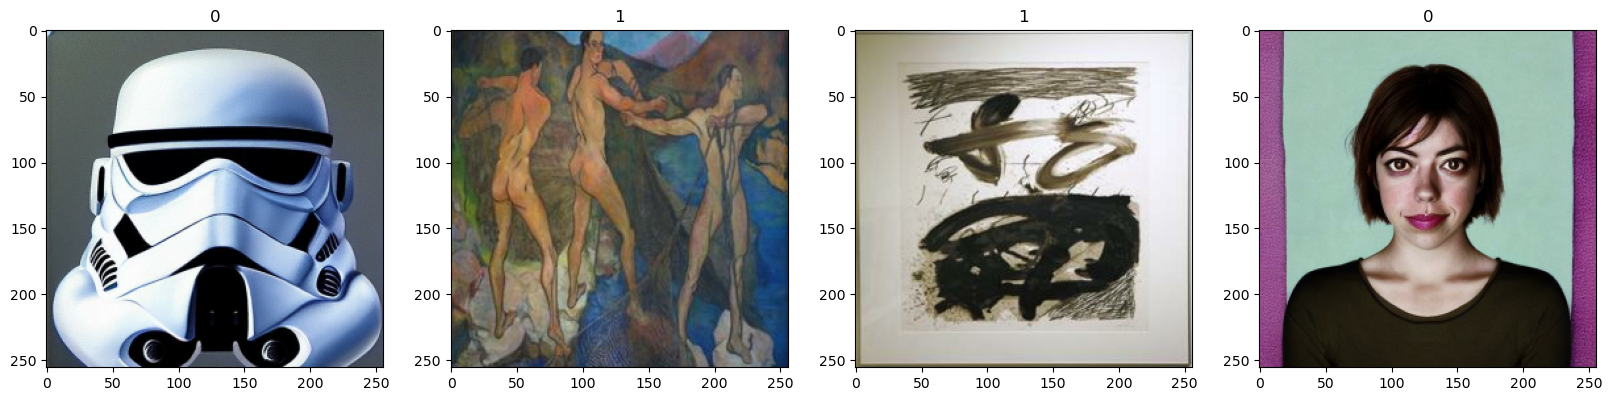

In [79]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch_scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_scaled[1][idx])

In [80]:
train_size = int(len(data_scaled)*0.7)
val_size = int(len(data_scaled)*0.1)+1
test_size = int(len(data_scaled)*0.2)+1
train_size+val_size+test_size

583

In [81]:
train = data_scaled.take(train_size)
test = data_scaled.skip(train_size).take(test_size)
validation = data_scaled.skip(train_size).skip(test_size).take(val_size)

In [82]:
train_it = train.as_numpy_iterator()
(train_it.next()[0])

array([[[[0.9490196 , 0.94509804, 0.9647059 ],
         [0.9490196 , 0.94509804, 0.9647059 ],
         [0.9490196 , 0.94509804, 0.9647059 ],
         ...,
         [0.9137255 , 0.9098039 , 0.93333334],
         [0.9137255 , 0.9098039 , 0.93333334],
         [0.9137255 , 0.9098039 , 0.93333334]],

        [[0.9490196 , 0.94509804, 0.9647059 ],
         [0.9490196 , 0.94509804, 0.9647059 ],
         [0.9490196 , 0.94509804, 0.9647059 ],
         ...,
         [0.9137255 , 0.9098039 , 0.93333334],
         [0.9137255 , 0.9098039 , 0.93333334],
         [0.9137255 , 0.9098039 , 0.93333334]],

        [[0.9490196 , 0.94509804, 0.9647059 ],
         [0.9490196 , 0.94509804, 0.9647059 ],
         [0.9490196 , 0.94509804, 0.9647059 ],
         ...,
         [0.9137255 , 0.9098039 , 0.93333334],
         [0.9137255 , 0.9098039 , 0.93333334],
         [0.9137255 , 0.9098039 , 0.93333334]],

        ...,

        [[0.88235295, 0.8784314 , 0.9019608 ],
         [0.88235295, 0.8784314 , 0.9019608 ]

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import BatchNormalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


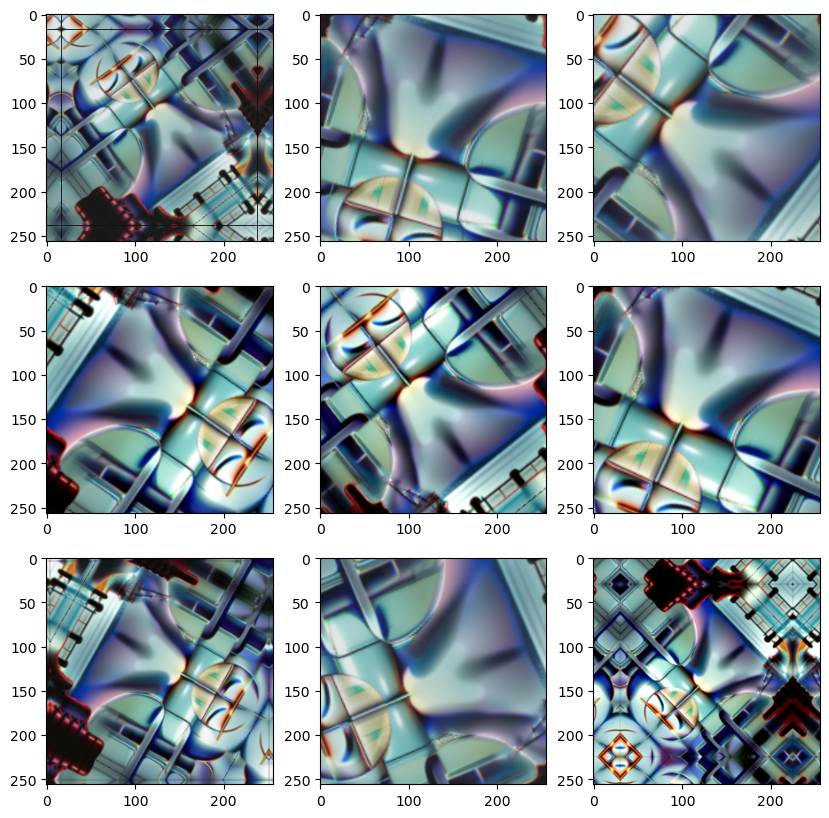

In [84]:
data_aug = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.4),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.5),
        tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
    ]
)
plt.figure(figsize=(10,10))
for images , _ in train.take(1):
    for i in range(9):
        augmented_images = data_aug(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0])

In [85]:
model = Sequential()

In [86]:
"""base_model = VGG16( include_top=False, input_shape=(224, 224, 3))"""

'base_model = VGG16( include_top=False, input_shape=(224, 224, 3))'

In [87]:
"""model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())  # Global average pooling layer

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))"""

"model = Sequential()\n\n# Block 1\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 2\nmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 3\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 4\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 5\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\nmodel.add(GlobalAveragePooling2D())  # Global average pooling layer\n\nmodel.add(Dense(4096, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(4096, activation='relu'))\nm

In [88]:
model.add(data_aug)

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
"""logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)"""

"logdir = 'logs'\ntensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)"

In [91]:
hist = model.fit(train,epochs=20,validation_data=validation)

Epoch 1/20
407/407 [==============================] - 237s 582ms/step - loss: 0.6506 - accuracy: 0.6323 - val_loss: 0.6045 - val_accuracy: 0.6751
Epoch 2/20
407/407 [==============================] - 206s 507ms/step - loss: 0.5729 - accuracy: 0.7079 - val_loss: 0.5149 - val_accuracy: 0.7465
Epoch 3/20
407/407 [==============================] - 199s 488ms/step - loss: 0.5308 - accuracy: 0.7469 - val_loss: 0.5734 - val_accuracy: 0.7200
Epoch 4/20
407/407 [==============================] - 200s 492ms/step - loss: 0.4972 - accuracy: 0.7688 - val_loss: 0.5526 - val_accuracy: 0.7081
Epoch 5/20
407/407 [==============================] - 185s 454ms/step - loss: 0.4677 - accuracy: 0.7865 - val_loss: 0.5610 - val_accuracy: 0.7086
Epoch 6/20
407/407 [==============================] - 190s 467ms/step - loss: 0.4522 - accuracy: 0.7984 - val_loss: 0.6677 - val_accuracy: 0.6227
Epoch 7/20
407/407 [==============================] - 183s 450ms/step - loss: 0.4283 - accuracy: 0.8117 - val_loss: 0.5448 -

In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)       

In [93]:
def pred_img(img):
    im = cv2.imread(img)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(im,(256,256))
    yhat = model.predict(np.expand_dims(resize/255,0))
    if (yhat >= 0.5):
        plt.imshow(im)
        plt.title("Real")
    else:
        plt.imshow(im)
        plt.title("AI Generated")

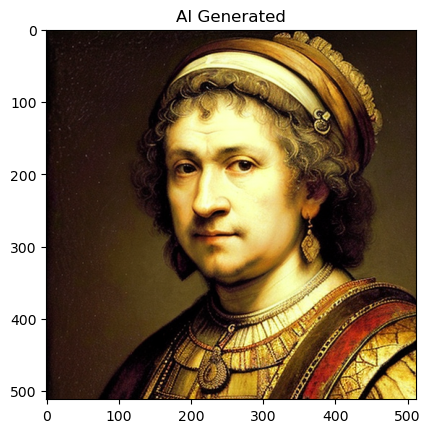

In [94]:
pred_img("test1.png") #AI

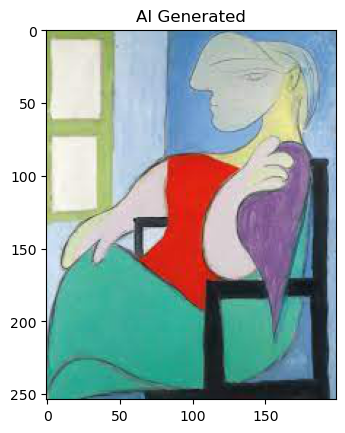

In [95]:
pred_img("test2.jpeg") #Real

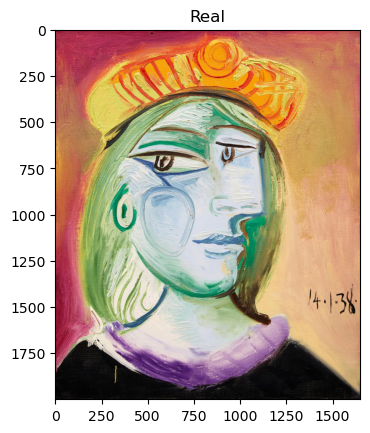

In [96]:
pred_img("test3.jpg") #Real

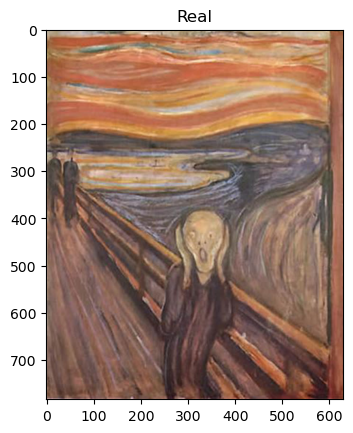

In [97]:
pred_img("Test4.png") # Real

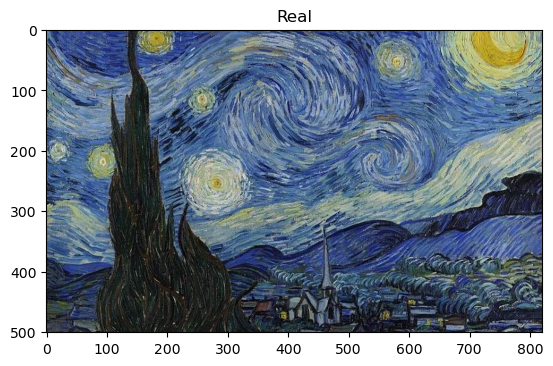

In [98]:
pred_img("test5.jpg") # Real

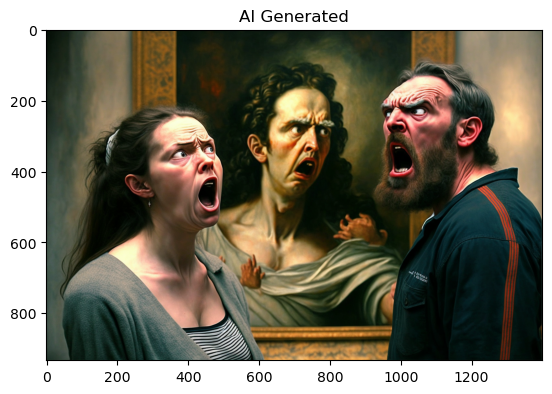

In [99]:
pred_img("test6.png") #AI

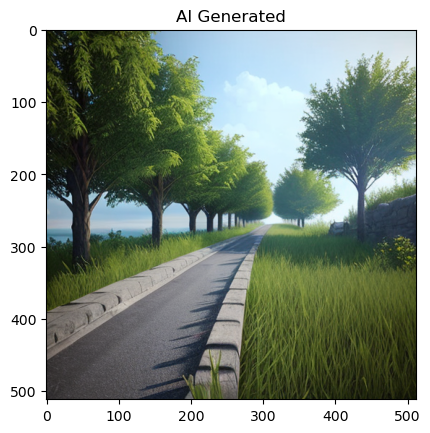

In [100]:
pred_img("test7.png") #AI

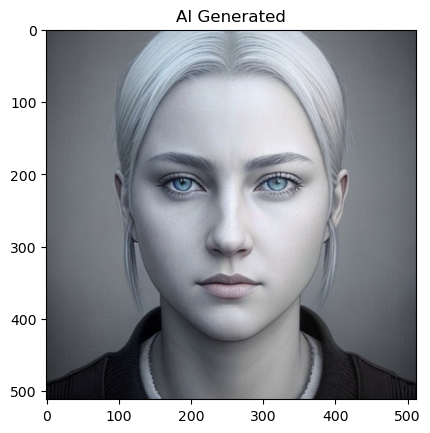

In [101]:
pred_img("test8.png") #AI

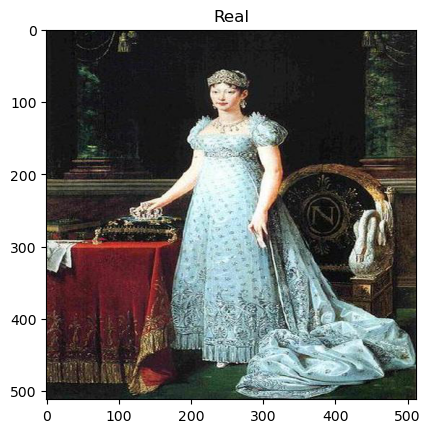

In [102]:
pred_img("test9.jpg") 

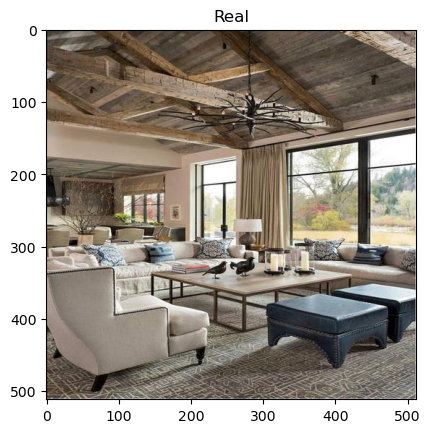

In [103]:
pred_img("test10.jpg") 

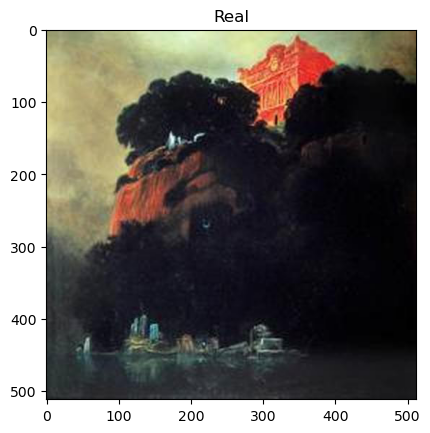

In [104]:
pred_img("test11.jpg") 

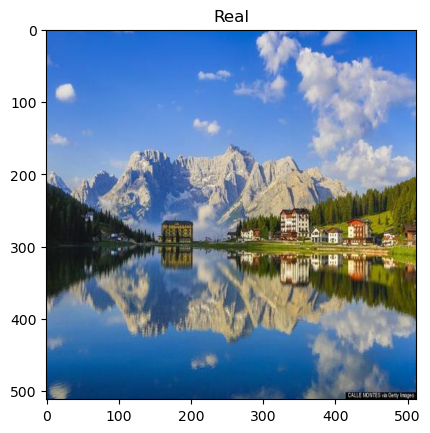

In [105]:
pred_img("test12.jpg") 

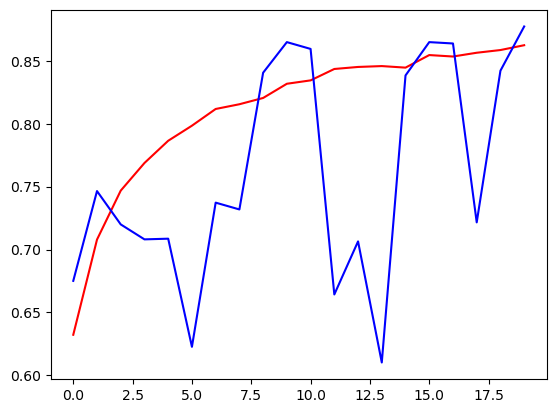

In [106]:
fig  = plt.figure()
plt.plot(hist.history["accuracy"],color='red')
plt.plot(hist.history["val_accuracy"],color='blue')
plt.show()

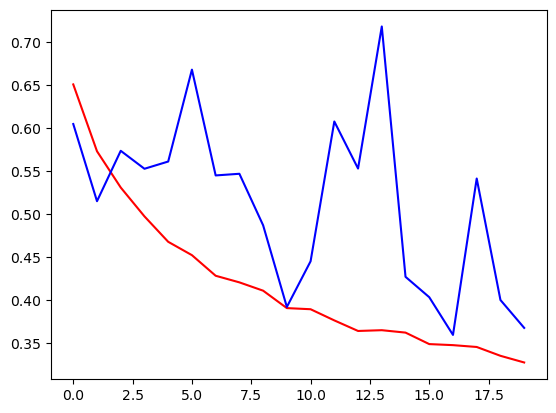

In [107]:
fig  = plt.figure()
plt.plot(hist.history["loss"],color='red')
plt.plot(hist.history["val_loss"],color='blue')
plt.show()

In [108]:
from tensorflow.keras.metrics import  Precision,BinaryAccuracy,Recall
pre = Precision()
ba = BinaryAccuracy()
Re = Recall()

In [109]:
for i in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    ba.update_state(y,yhat)
    Re.update_state(y,yhat)

In [110]:
pre.result().numpy()

0.0

In [111]:
ba.result().numpy()

0.625

In [112]:
Re.result().numpy()

0.0

In [113]:
#model.save('my_model.keras')